In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

enrolment_df = pd.read_csv("../data/clean_enrolment.csv")
biometric_df = pd.read_csv("../data/clean_biometric.csv")
demographic_df = pd.read_csv("../data/clean_demographic.csv")

enrolment_df["date"] = pd.to_datetime(enrolment_df["date"])
biometric_df["date"] = pd.to_datetime(biometric_df["date"])
demographic_df["date"] = pd.to_datetime(demographic_df["date"])


In [2]:
# Aggregate enrolment by date
daily_enrol = enrolment_df.groupby("date")["total_enrolment"].sum()

mean = daily_enrol.mean()
std = daily_enrol.std()

z_scores = (daily_enrol - mean) / std

anomalies_enrol = daily_enrol[np.abs(z_scores) > 2]

anomalies_enrol


date
2025-04-01    257438
2025-07-01    616868
Name: total_enrolment, dtype: int64

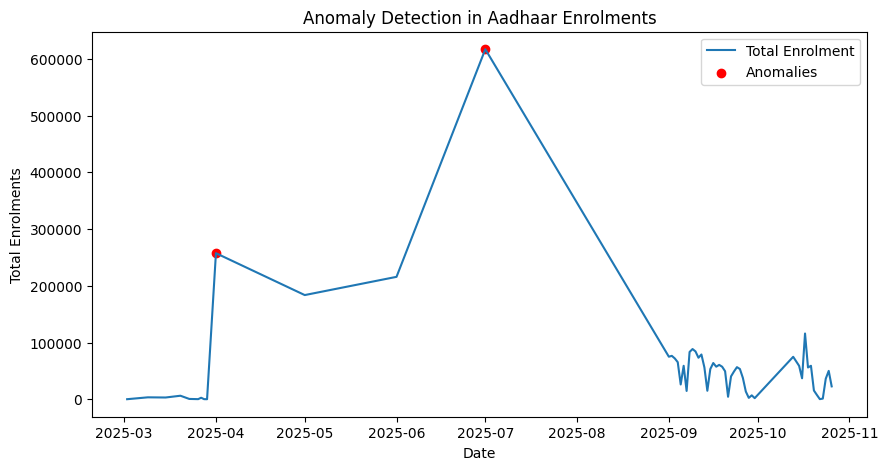

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(daily_enrol.index, daily_enrol.values, label="Total Enrolment")
plt.scatter(anomalies_enrol.index, anomalies_enrol.values, color="red", label="Anomalies")
plt.legend()
plt.title("Anomaly Detection in Aadhaar Enrolments")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.show()


In [4]:
daily_demo = demographic_df.groupby("date")["total_demographic_updates"].sum()

mean_demo = daily_demo.mean()
std_demo = daily_demo.std()

z_demo = (daily_demo - mean_demo) / std_demo

anomalies_demo = daily_demo[np.abs(z_demo) > 2]

anomalies_demo


date
2025-03-01    3955754
Name: total_demographic_updates, dtype: int64

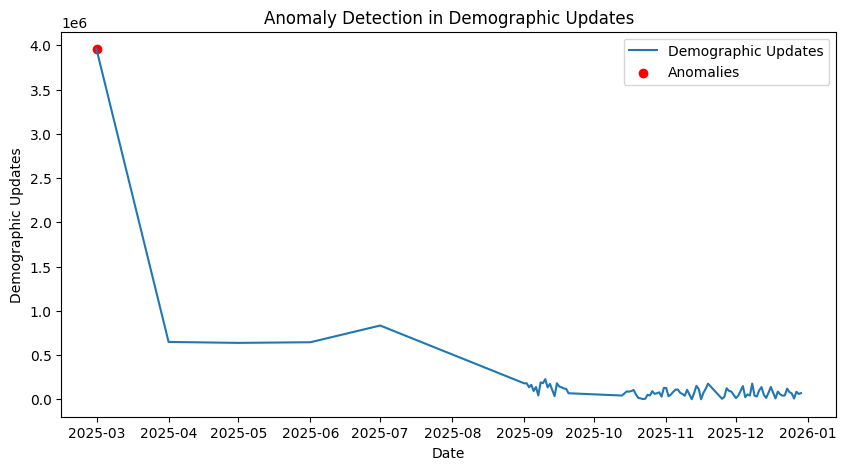

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(daily_demo.index, daily_demo.values, label="Demographic Updates")
plt.scatter(anomalies_demo.index, anomalies_demo.values, color="red", label="Anomalies")
plt.legend()
plt.title("Anomaly Detection in Demographic Updates")
plt.xlabel("Date")
plt.ylabel("Demographic Updates")
plt.show()


In [6]:
state_daily = (
    enrolment_df
    .groupby(["state", "date"])["total_enrolment"]
    .sum()
    .reset_index()
)

state_stats = state_daily.groupby("state")["total_enrolment"].agg(["mean", "std"]).reset_index()

state_anomalies = state_daily.merge(state_stats, on="state")
state_anomalies["z"] = (state_anomalies["total_enrolment"] - state_anomalies["mean"]) / state_anomalies["std"]

state_anomalies[state_anomalies["z"].abs() > 3].head()


,state,date,total_enrolment,mean,std,z
37,Andaman And Nicobar Islands,2025-09-01,22,6.161290,4.480303,3.535187
114,Arunachal Pradesh,2025-07-01,484,66.883721,73.269304,5.692920
162,Assam,2025-07-01,47873,3411.489796,7650.432564,5.811634
213,Bihar,2025-06-01,46386,7517.326923,11102.008913,3.501049
214,Bihar,2025-07-01,59274,7517.326923,11102.008913,4.661920
